### importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### lendo arquivos

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### renomeando colunas

In [4]:
filmes.columns = ['filmeId', 'titulo', 'generos']
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

### agrupando dataframes

In [5]:
medias_filmes = avaliacoes.groupby('filmeId')['nota'].mean()

In [6]:
filmes_com_media = filmes.join(medias_filmes, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [7]:
# renomeando uma unica coluna.
filmes_com_media.rename({'nota' : 'media'},axis=1, inplace=True)

### separando os gêneros dos filmes

In [8]:
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# somando cada genero
filmes['generos'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [10]:
# ordenando os generos somados
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

### plotando gráficos

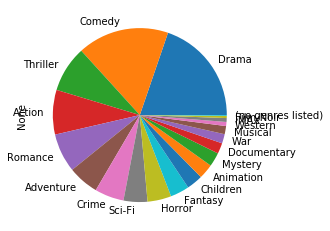

In [11]:
# gráfico de pizza não é muito bom para data visualization
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='pie')

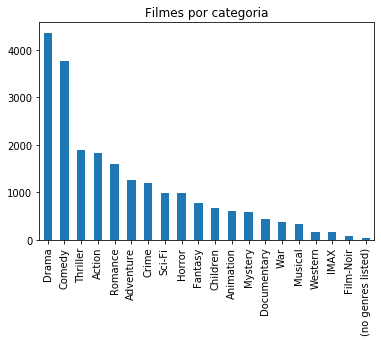

In [12]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', title='Filmes por categoria')

plt.show()

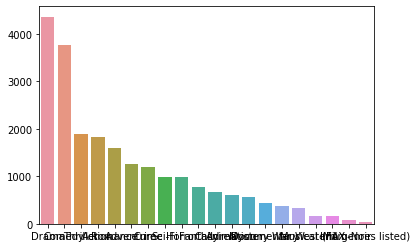

In [13]:
# plotando um gráfico
filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

sns.barplot(x = filmes_por_genero.index, 
            y = filmes_por_genero.values)

plt.show()

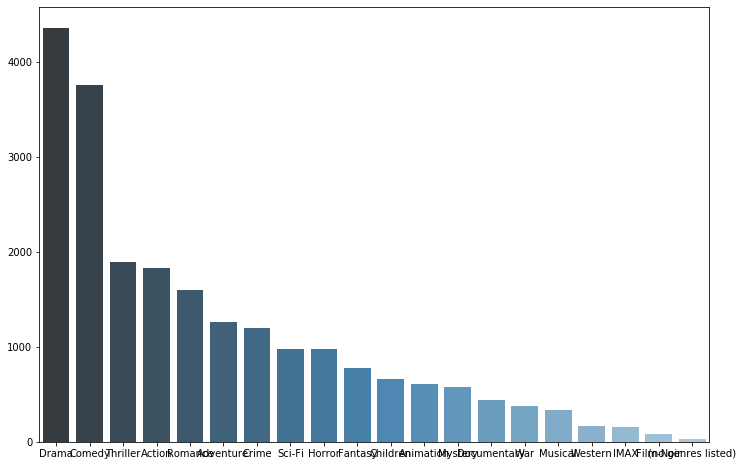

In [14]:
# inserindo parâmetros para melhor visualização do gráfico
plt.figure(figsize=(12,8))
sns.barplot(x = filmes_por_genero.index, 
            y = filmes_por_genero.values,
            palette='Blues_d')

plt.show()

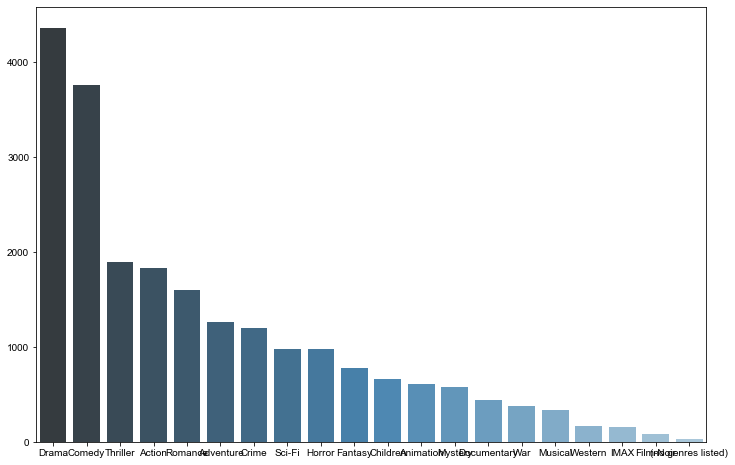

In [15]:
plt.figure(figsize=(12,8))

sns.barplot(x = filmes_por_genero.index, 
            y = filmes_por_genero.values,
            palette='Blues_d')
sns.set_style('whitegrid')            

plt.show()

### media, mediana

Média do filme 1: 3.9209302325581397


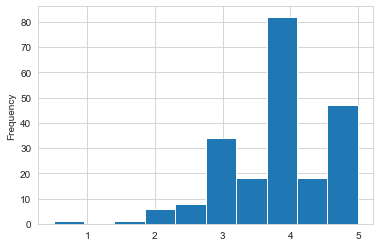

In [16]:
# plotando um histograma do filme 1

notas_filme_1 = avaliacoes.query('filmeId == 1')['nota']
print('Média do filme 1:', notas_filme_1.mean())


notas_filme_1.plot(kind='hist')

plt.show()

Média do filme 2: 3.4318181818181817


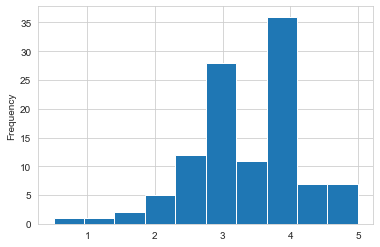

In [17]:
# plotando um histograma do filme 2

notas_filme_2 = avaliacoes.query('filmeId == 2')['nota']
print('Média do filme 2:', notas_filme_2.mean())


notas_filme_2.plot(kind='hist')

plt.show()

In [18]:
# exibindo as descrições estatisticas das notas do filme 1
notas_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [19]:
# exibindo as descrições estatisticas das notas do filme 2
notas_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [20]:
# visualizando o dataframe
filmes_com_media

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [21]:
# selecionando um intervalo de medias próximas
filmes_com_media.sort_values('media', ascending=False)[2450:2500]

,filmeId,titulo,generos,media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


##### comparando filmes

In [22]:
# criando uma função
def plot_filme(n):
    notas_do_filme = avaliacoes.query(f'filmeId == {n}')['nota']
    notas_do_filme.plot(kind='hist')
    plt.show()
    notas_do_filme.plot.box()
    plt.show()
    return notas_do_filme.describe()

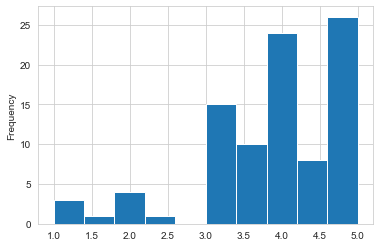

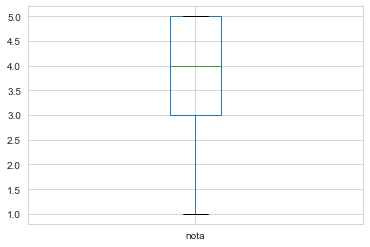

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [23]:
plot_filme(919)

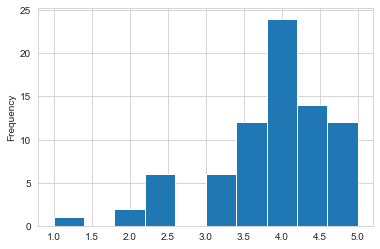

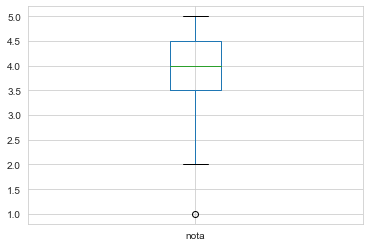

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [24]:
plot_filme(46578)

# Desafio 1:
rotacionar os ticks a 45º

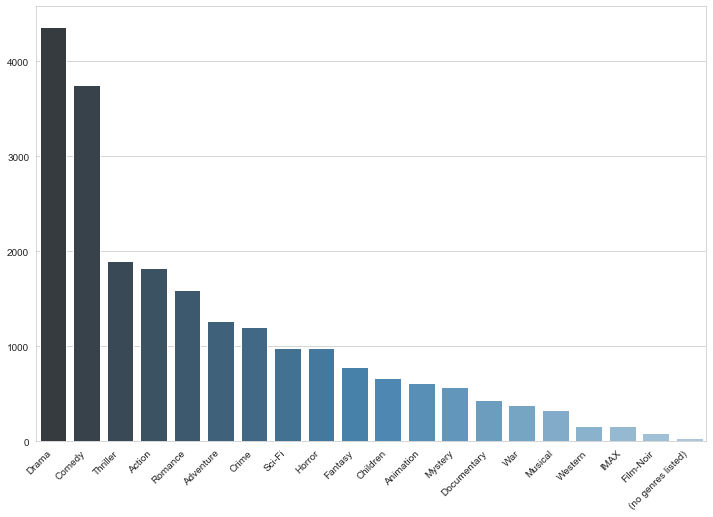

In [25]:
plt.figure(figsize=(12,8))

sns.set_style('whitegrid') 
sns.barplot(x = filmes_por_genero.index, 
            y = filmes_por_genero.values,
            palette='Blues_d')
          
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

# Desafio 2:
comparar outros filmes com notas próximas e achar distibuições diferentes

In [26]:
# selecionando um intervalo de medias próximas (usando o mesmo intervalo anteriormente usado)
filmes_com_media.sort_values('media', ascending=False)[2450:2500]

,filmeId,titulo,generos,media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


#### 3.1. - Little Women (1994)

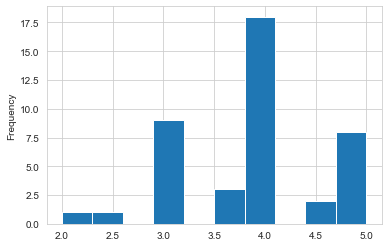

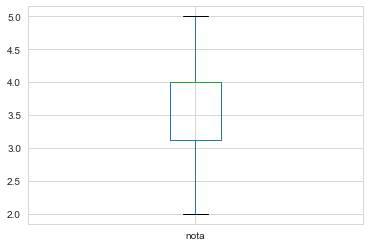

count    42.000000
mean      3.880952
std       0.763573
min       2.000000
25%       3.125000
50%       4.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [27]:
plot_filme(261)

O filme Little Women apresentou como menor nota o valor 2 e maior o valor 5. A concentração dos votos se dá principalmente na nota 4. Ao compararmos outros valores além da moda, percebemos uma maior tendência de votos entre o intervalo 3 e 4 do que o intervalo 4 e 5. 

#### 3.2. - Mary Poppins (1964)

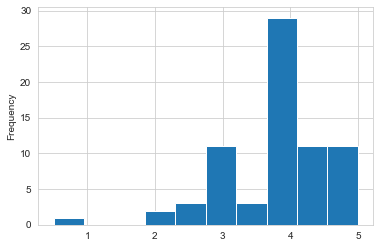

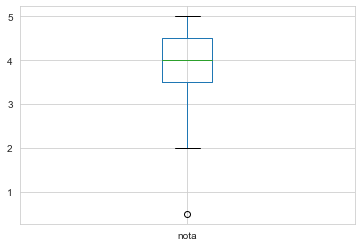

count    71.000000
mean      3.887324
std       0.858559
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [28]:
plot_filme(1028)

O filme Mary Poppins apresentou como menor nota o valor 0.5 (considerado um outlier pelo gráfico) e maior o valor 5. A concentração dos votos se dá principalmente na nota 4. Ao compararmos outros valores além da moda, percebemos uma maior tendência de votos entre o intervalo 4 e 5 do que o intervalo 3 e 4. Visualizando esse gráfico, é possível notar uma tendência das pessoas gostarem mais desse filme quando comparado ao filme Little Women, que possui uma distribuição bem desuniforme.

#### 3.3. - Harry Potter and the Half-Blood Prince (2009)	

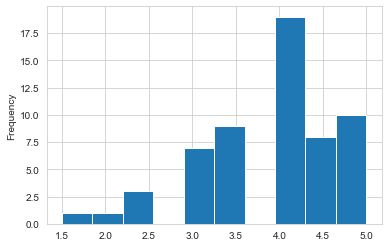

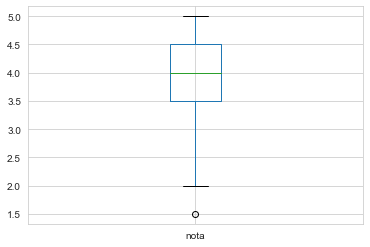

count    58.000000
mean      3.887931
std       0.811340
min       1.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [29]:
plot_filme(69844)

O filme Harry Potter and the Half-Blood Prince apresentou como menor nota o valor 1.5 (considerado um outlier pelo gráfico) e maior o valor 5. A concentração dos votos se dá principalmente na nota 4. Ao compararmos outros valores além da moda, percebemos uma tendência de votos entre o intervalo 4 e 5 do que o intervalo 3 e 4, entretanto, essa diferença não é tão explicita visualmente. A distribuição do gráfico mostra que, de modo geral, as pessoas gostam do filme. Como Harry Potter é uma franquia, as notas mais baixas podem ter relação com a expectativa entre os outros filmes e livros da saga.

# Desafio 3:
Criar o boxplot dos 10 filmes com mais votos

In [30]:
# ordenando os filmes com mais votos
contagem_votos = avaliacoes.groupby('filmeId')['nota'].count().sort_values(ascending=False)
dez_mais_votados = contagem_votos.head(10)

# criando uma lista com o index (filmeId)
list = dez_mais_votados.index

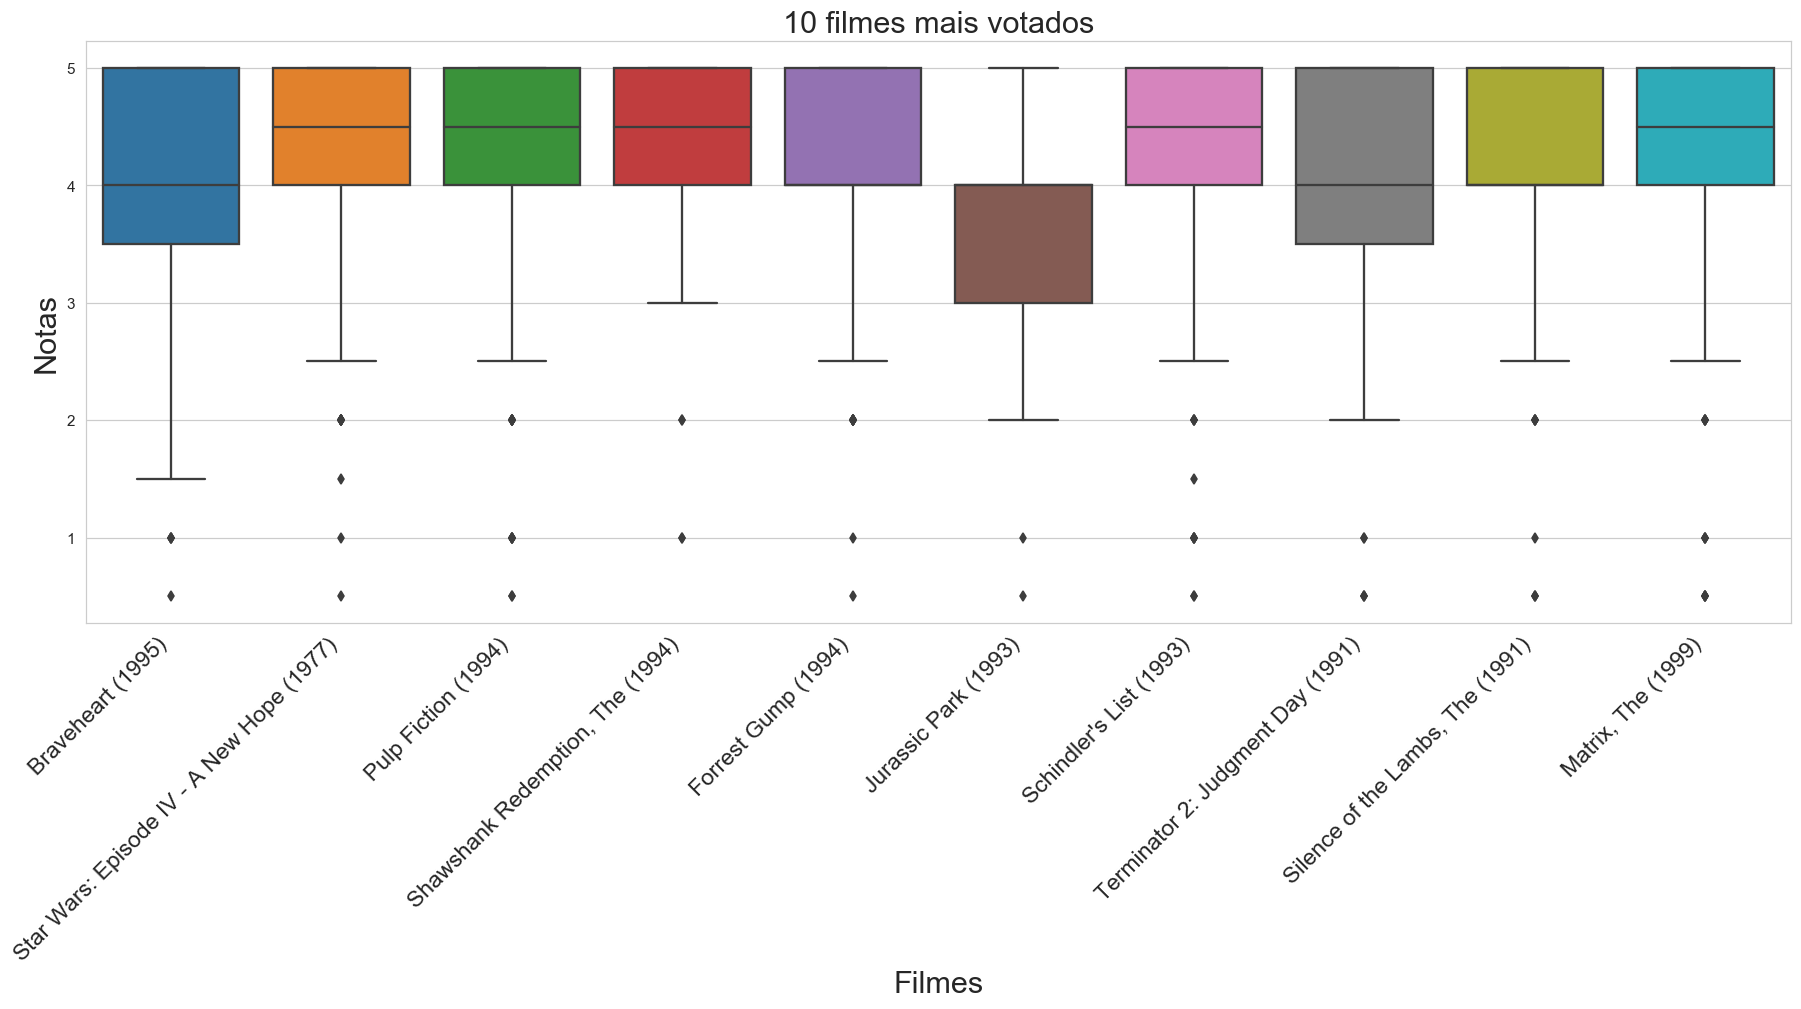

In [31]:
# plotando a figura

plt.figure(figsize = (20,7), dpi=110)


ax = sns.boxplot(data = avaliacoes.query('filmeId in list'), x ='filmeId', y='nota')

ax.set_title('10 filmes mais votados', fontsize=20)
ax.set_xticklabels(filmes.query('filmeId in list')['titulo'], 
                   fontsize=15, rotation=45, horizontalalignment='right')
ax.set_xlabel('Filmes', fontsize=20)
ax.set_ylabel('Notas', fontsize=20)

plt.show()

# Desafio 4:
O boxplot estar num tamanho adequado e com os nomes dos filmes nos ticks

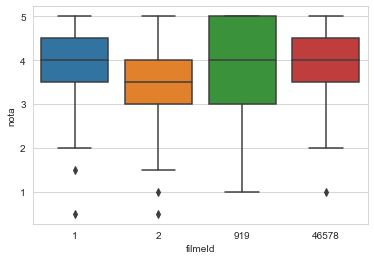

In [32]:
# plot para corrigir
sns.boxplot(data = avaliacoes.query('filmeId in [1, 2, 919, 46578]'),
           x = 'filmeId', y = 'nota')

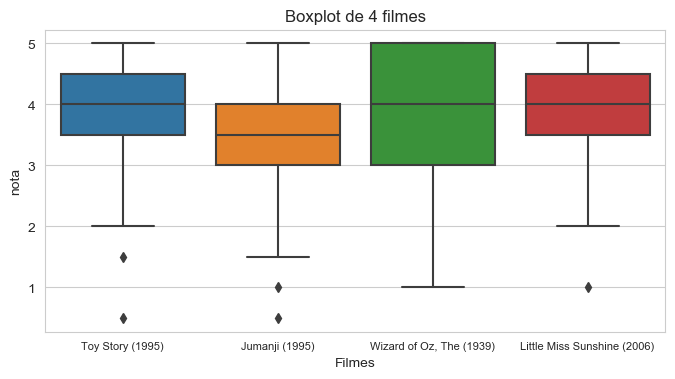

In [33]:
plt.figure(figsize=(8,4), dpi=100)

ax = sns.boxplot(data = avaliacoes.query('filmeId in [1, 2, 919, 46578]'),
           x = 'filmeId', y = 'nota')
ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=8)

ax.set_title('Boxplot de 4 filmes')
ax.set_xlabel('Filmes')

plt.show()

# Desafio 5:
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3, 5

#### 5.1 Calculo da mediana

In [34]:
mediana = avaliacoes.groupby('filmeId')['nota'].median().to_frame()
mediana.rename({'nota': 'mediana'}, axis=1, inplace=True)

In [35]:
filmes_e_estatistica = filmes_com_media.join(mediana, on='filmeId')
filmes_e_estatistica

,filmeId,titulo,generos,media,mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.5
9739,193585,Flint (2017),Drama,3.500000,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,3.5


#### 5.2 Calculo da moda

In [36]:
filmes_moda = avaliacoes.groupby(by='filmeId')['nota'].agg(lambda x:x.value_counts().index[0]).to_frame()
filmes_moda.rename({'nota': 'moda'}, axis=1, inplace=True)
filmes_moda

,moda
filmeId,
1,4.0
2,4.0
3,3.0
4,3.0
5,3.0
...,...
193581,4.0
193583,3.5
193585,3.5


In [37]:
filmes_e_estatistica = filmes_e_estatistica.join(filmes_moda, on='filmeId')
filmes_e_estatistica

,filmeId,titulo,generos,media,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0,3.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4.0,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.5,3.5
9739,193585,Flint (2017),Drama,3.500000,3.5,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,3.5,3.5


#### 5.3 Filmes com notas médias e medianas maiores

In [38]:
filmes_proximo_cinco = filmes_e_estatistica.loc[(filmes_e_estatistica['media'] >= 4.9) & (
                                                 filmes_e_estatistica['mediana'] >= 4.9)]

filmes_proximo_cinco

,filmeId,titulo,generos,media,mediana,moda
48,53,Lamerica (1994),Adventure|Drama,5.0,5.0,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,5.0,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0,5.0,5.0
405,467,Live Nude Girls (1995),Comedy,5.0,5.0,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,5.0,5.0
...,...,...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),5.0,5.0,5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,5.0,5.0,5.0
9634,179135,Blue Planet II (2017),Documentary,5.0,5.0,5.0
9688,184245,De platte jungle (1978),Documentary,5.0,5.0,5.0


#### 5.4 Filmes com notas médias e medianas menores (0.5 e 1)

In [39]:
filmes_proximo_meio = filmes_e_estatistica.loc[(filmes_e_estatistica['media'] <= 1) & (
                                                filmes_e_estatistica['mediana'] <= 1)]

filmes_proximo_meio

,filmeId,titulo,generos,media,mediana,moda
150,178,Love & Human Remains (1993),Comedy|Drama,1.0,1.0,1.0
390,449,Fear of a Black Hat (1994),Comedy,1.0,1.0,1.0
408,470,House Party 3 (1994),Comedy,1.0,1.0,1.0
414,476,"Inkwell, The (1994)",Comedy|Drama,1.0,1.0,1.0
571,698,Delta of Venus (1995),Drama,1.0,1.0,1.0
...,...,...,...,...,...,...
9693,184641,Fullmetal Alchemist 2018 (2017),Action|Adventure|Fantasy,0.5,0.5,0.5
9722,189547,Iron Soldier (2010),Action|Sci-Fi,1.0,1.0,1.0
9727,190213,John From (2015),Drama,1.0,1.0,1.0
9729,190219,Bunny (1998),Animation,1.0,1.0,1.0


#### 5.5 Filmes com notas médias e medianas intermediários

In [40]:
filmes_proximos_tres = filmes_e_estatistica.loc[(filmes_e_estatistica['media'] == 3) & (
                                                 filmes_e_estatistica['mediana'] == 3)]

filmes_proximos_tres

,filmeId,titulo,generos,media,mediana,moda
14,15,Cutthroat Island (1995),Action|Adventure|Romance,3.0,3.0,4.0
38,42,Dead Presidents (1995),Action|Crime|Drama,3.0,3.0,3.0
45,49,When Night Is Falling (1995),Drama|Romance,3.0,3.0,3.0
75,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,3.0,3.0,3.0
91,103,Unforgettable (1996),Mystery|Sci-Fi|Thriller,3.0,3.0,3.0
...,...,...,...,...,...,...
9703,185435,"Game Over, Man! (2018)",Action|Comedy,3.0,3.0,3.0
9704,185473,Blockers (2018),Comedy,3.0,3.0,3.0
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,3.0,3.0,3.0
9719,189111,Spiral (2018),Documentary,3.0,3.0,3.0


# Desafio 6:
Plotar o boxplot e o histograma um do lado do outro (mesma figura ou em figuras distintas)

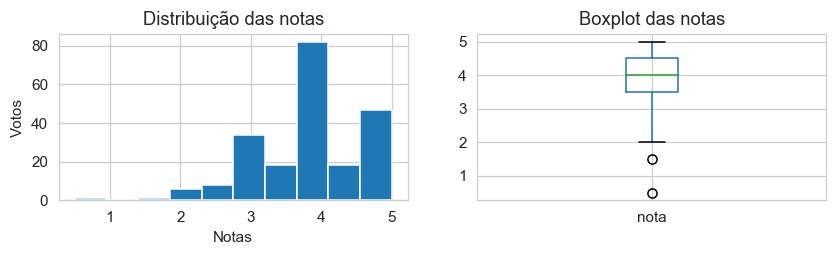

In [41]:
f, ax = plt.subplots(1, 2, figsize=(9, 2), dpi=110)

notas_filme_1.hist(ax=ax[0])
ax[0].set_title('Distribuição das notas')
ax[0].set_xlabel('Notas')
ax[0].set_ylabel('Votos')

notas_filme_1.plot.box(ax=ax[1])
ax[1].set_title('Boxplot das notas')

plt.show()


# Desafio 7:
Gráfico das notas médias por ano

In [42]:
#criando uma copia do dataframe
filmes_com_media_e_ano = filmes_com_media.copy()

#removemendo os valores entre parenteses e os colocando em uma outra coluna
filmes_com_media_e_ano['ano'] = filmes_com_media_e_ano['titulo'].str.extract('\((\d{4})\)')
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


In [43]:
# agrupando os dados
agrupamento_ano = filmes_com_media_e_ano.groupby('ano')['media'].mean()
agrupamento_ano

ano
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
1916    3.562500
          ...   
2014    3.113464
2015    3.069094
2016    3.103748
2017    3.376749
2018    3.372561
Name: media, Length: 106, dtype: float64

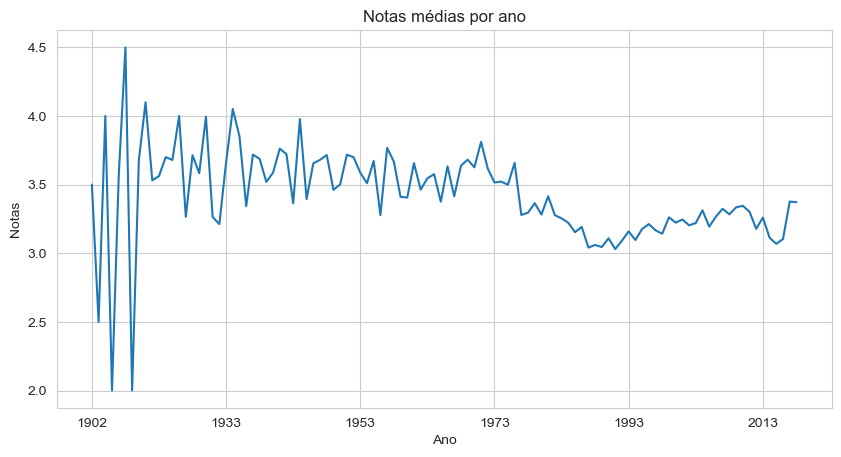

In [44]:
# plotando o gráfico
plt.figure(figsize=(10, 5), dpi=100)

agrupamento_ano.plot()
plt.title('Notas médias por ano')
plt.xlabel('Ano')
plt.ylabel('Notas')

plt.show()